# Load and Preprocess

In [74]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pandas.options.display.max_rows = 999

sns.set_theme(style="whitegrid")
sns.set_palette('colorblind')
# palette = sns.color_palette("colorblind")
palette ={"base": "C3", "optimized": "C2", "modin":"C1"}
#sns.palplot(palette)
df=pandas.read_feather('reports/bench_report_mancorr_11Jul.feather')


In [75]:
dependent_variables = ['wall_time','bytes_memory', 'cpu_percent', 'bytes_sent', 'bytes_recv', 'exitcode','db_time']
factors = list(set(df.columns) - set(dependent_variables))
df['cpu_percent'] = df['cpu_percent'].apply(lambda x: sum(x)/len(x)) 

#df['scale'] = df['scale'].astype(str)

# make oom's zero
#df.loc[df['oom'] == True, dependent_variables] = 0
#df.head(2)
#df.dtypes

# Sanity Check

In [76]:
df

,bytes_memory,cpu_percent,bytes_sent,bytes_recv,wall_time,exitcode,db_time,rep,wflow,optimizer,process_snapshot
0,1040384,32.500,1468484902,1468484902,62.276851,0,57.619797,1,micro_join.py,base,0
1,8802304,52.650,1468484902,1468484902,62.276851,0,57.619797,1,micro_join.py,base,1
2,19898368,96.875,1468484902,1468484902,62.276851,0,57.619797,1,micro_join.py,base,2
3,30220288,25.000,1468484902,1468484902,62.276851,0,57.619797,1,micro_join.py,base,3
4,44711936,30.950,1468484902,1468484902,62.276851,0,57.619797,1,micro_join.py,base,4
...,...,...,...,...,...,...,...,...,...,...,...
8384,41086976,25.000,13379,13379,1.186456,0,0.880508,1,micro_sel.py,optimized,10
8385,41086976,25.000,13379,13379,1.186456,0,0.880508,1,micro_sel.py,optimized,11
8386,41082880,25.000,13379,13379,1.186456,0,0.880508,1,micro_sel.py,optimized,12
8387,41082880,25.000,13379,13379,1.186456,0,0.880508,1,micro_sel.py,optimized,13


In [77]:
# make sure exitcode is the same in all repetitions
#df.loc[0, 'oom']=True # used to test code below

In [78]:
# def sanity_check():
#     assert (df['bytes_sent'] == df['bytes_recv']).all()
    
#     sub_df = df[factors + ['exitcode']]
#     exitcode_pivot_df = sub_df.pivot(index=set(sub_df.columns)-{'rep','exitcode'}, columns='rep', values='exitcode')
#     col1, restcols = exitcode_pivot_df.columns[0], exitcode_pivot_df.columns[1:]
#     for col in restcols:
#         bitmask = exitcode_pivot_df[col1] == exitcode_pivot_df[col]
#         assert bitmask.all()
# sanity_check()

# CPU Graph

In [79]:
## Select factors
selection_df = df[df['rep']==1]
selection_df.drop(columns=['rep'], inplace=True) # no need to drop

selection_df = selection_df[df['wflow']=='micro_join.py']
selection_df.drop(columns=['wflow'], inplace=True) # no need to drop



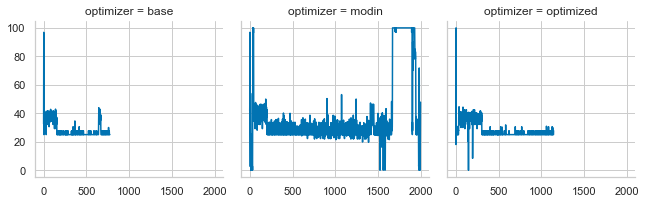

In [80]:
# lplot = sns.lineplot(x="process_snapshot", y="cpu_percent",
#              hue="optimizer",
#              data=selection_df)
g = sns.FacetGrid(selection_df, col="optimizer")
g.map_dataframe(sns.lineplot, x="process_snapshot", y='cpu_percent', palette=palette)
# g.set_axis_labels("Scale", "Wall time")
g.add_legend()

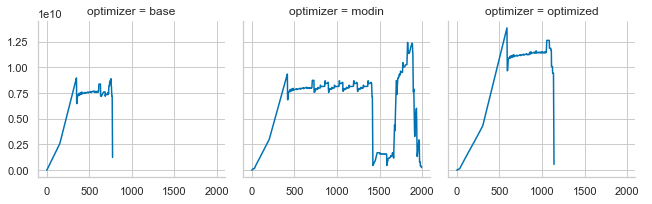

In [83]:
# lplot = sns.lineplot(x="process_snapshot", y="cpu_percent",
#              hue="optimizer",
#              data=selection_df)
g = sns.FacetGrid(selection_df, col="optimizer")
g.map_dataframe(sns.lineplot, x="process_snapshot", y='bytes_memory', palette=palette)
# g.set_axis_labels("Scale", "Wall time")
g.add_legend()

In [84]:
selection_df

,bytes_memory,cpu_percent,bytes_sent,bytes_recv,wall_time,exitcode,db_time,optimizer,process_snapshot
0,1040384,32.500,1468484902,1468484902,62.276851,0,57.619797,base,0
1,8802304,52.650,1468484902,1468484902,62.276851,0,57.619797,base,1
2,19898368,96.875,1468484902,1468484902,62.276851,0,57.619797,base,2
3,30220288,25.000,1468484902,1468484902,62.276851,0,57.619797,base,3
4,44711936,30.950,1468484902,1468484902,62.276851,0,57.619797,base,4
...,...,...,...,...,...,...,...,...,...
8313,6744485888,25.000,2132329659,2132329659,91.908522,0,90.090591,optimized,1137
8314,5230346240,25.000,2132329659,2132329659,91.908522,0,90.090591,optimized,1138
8315,3674718208,25.000,2132329659,2132329659,91.908522,0,90.090591,optimized,1139
8316,2121338880,25.000,2132329659,2132329659,91.908522,0,90.090591,optimized,1140
